### NOTEBOOK CONTENTS

    -A map of yearly CO2 flux (g/m2/yr) for the BR, LA, and PI runs
    colourscheme

        BR red
        LA dimgrey
        PI cornflowerblue



In [214]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [215]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [216]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools

from math import log10, floor


In [217]:
def make_nclist(start,end, tdir, verbose):
    
    rootdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/'
    nc_array = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    
    
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ymd = tdate.format('YYYYMMDD')
        if verbose == True:
            print(ymd)

        ##SKOG_1d_20151127_20151231_ptrc_T_20151231-20151231.nc    
        t_nc = rootdir + tdir + '/ncs/' \
        '/SKOG_1d_*' + '_carp_T_' +str(ymd) + '-' + str(ymd) + '.nc'
        t_ncname = glob.glob(t_nc)
        if verbose == True:
            print('file is: ' + t_ncname[0])
            print('')
        nc_array.append(t_ncname[0])
        
    return nc_array


#### cell for making nclist and extracting co2 values for the year for each run 
#### I pickled these results, the code to get the pickles is below

In [218]:
# start = '2015-01-01'
# end = '2015-12-31'

# BR = 'BR_2nd_2015/'
# PI_AC = 'PI_3rd_2015'
# PI_ACBC = 'PI_ACBC_2015_3/'

# nc_BR = make_nclist(start,end,BR,False)
# nc_PI_AC = make_nclist(start,end,PI_AC,False)
# nc_PI_ACBC = make_nclist(start,end,PI_ACBC,False)

# BR_flx = np.zeros([365,898,398])
# PI_flx = np.zeros([365,898,398])
# PI_ACBC_flx = np.zeros([365,898,398])

# for i in range(0,365):
#     if i%25 ==0:
#         print(i)
#     BR = nc.Dataset(nc_BR[i])
#     BR_flx[i,:,:] = BR['co2_flux_mmol_m2_s'][0,:,:]
#     PI = nc.Dataset(nc_PI_AC[i])
#     PI_flx[i,:,:] = PI['co2_flux_mmol_m2_s'][0,:,:]
#     PI_ACBC = nc.Dataset(nc_PI_ACBC[i])
#     PI_ACBC_flx[i,:,:] = PI_ACBC['co2_flux_mmol_m2_s'][0,:,:]
    
# pickle.dump(BR_flx, open("BR_flx.pkl", 'wb'))
# pickle.dump(PI_flx, open("LA_flx.pkl", 'wb'))
# pickle.dump(PI_ACBC_flx, open("PI_flx.pkl", 'wb'))    

In [219]:
f = open('BR_flx.pkl', 'rb')
BR_flx = pickle.load(f)   
f = open('PI_flx.pkl', 'rb')
PI_flx = pickle.load(f) 
f = open('LA_flx.pkl', 'rb')
LA_flx = pickle.load(f) 

#### CO2 flux is in mmol/m2/s
#### for each day convert it to mmol/m2/day - then add all the days to get mmol/m2/year
#### how many seconds in a day? 

        60 s/min * 60 min/h * 24h/ day = 86400
        
#### once we have mmol/m2/year we convert to grams of C in a mmol. 
#### how many grams of C in a mmol? 12.0107 * 10e-3, by definition. 

In [220]:
BR_flx_mmol_m2_day = BR_flx * 86400
LA_flx_mmol_m2_day = LA_flx * 86400
PI_flx_mmol_m2_day = PI_flx * 86400



In [221]:
BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
PI_flx_mmol_m2_yr = np.sum(PI_flx_mmol_m2_day, axis = 0)
LA_flx_mmol_m2_yr = np.sum(LA_flx_mmol_m2_day, axis = 0)



In [222]:
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
PI_flx_gC_m2_yr = PI_flx_mmol_m2_yr*12.0107*1e-3
LA_flx_gC_m2_yr = LA_flx_mmol_m2_yr*12.0107*1e-3


BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr>1e6]=np.nan
LA_flx_gC_m2_yr[LA_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr==0]=np.nan
LA_flx_gC_m2_yr[LA_flx_gC_m2_yr==0]=np.nan

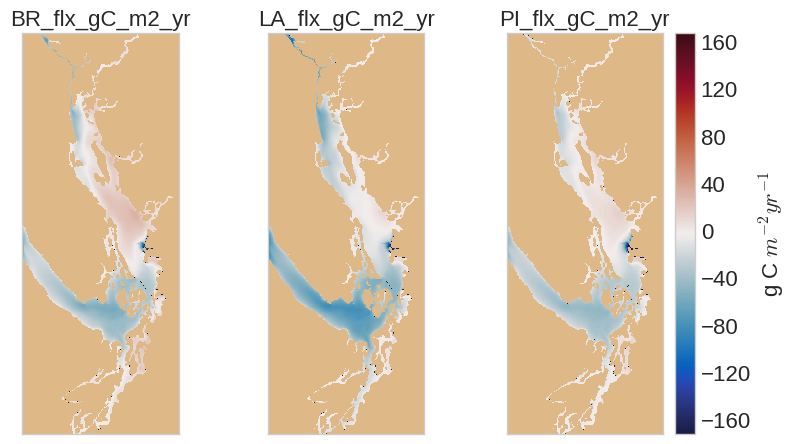

In [223]:
fact = 0.7
tf = 16


fig = plt.figure(figsize=(12*fact,6.5*fact))

ax1 = fig.add_subplot(1,3,1)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax1.set_title('BR_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax2 = fig.add_subplot(1,3,3)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax2.set_title('PI_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=tf)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = tf)

ax3 = fig.add_subplot(1,3,2)
tplt = LA_flx_gC_m2_yr
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-170, vmax=170)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')

ax3.set_title('LA_flx_gC_m2_yr', fontsize = tf)
plt.xticks([])
plt.yticks([])


plt.tight_layout()

In [224]:
def round_sig(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)


#BR_avg = round_sig(np.mean(BR_flx_gC_m2_yr),4)

print('source (-) sink(+) g C/m2/yr stats for the three runs')
print('')
print('BR run:')
print('average:'+ str(round_sig(np.nanmean(BR_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(BR_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(BR_flx_gC_m2_yr),4)))
print('')
print('PI run:')
print('average:'+ str(round_sig(np.nanmean(PI_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(PI_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(PI_flx_gC_m2_yr),4)))
print('')
print('LA run:')
print('average:'+ str(round_sig(np.nanmean(LA_flx_gC_m2_yr),4)))
print('max:'+ str(round_sig(np.nanmax(LA_flx_gC_m2_yr),4)))
print('min:'+ str(round_sig(np.nanmin(LA_flx_gC_m2_yr),4)))

source (-) sink(+) g C/m2/yr stats for the three runs

BR run:
average:-7.134
max:35.33
min:-147.3

PI run:
average:-10.04
max:21.28
min:-186.0

LA run:
average:-23.14
max:14.81
min:-165.5


1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait


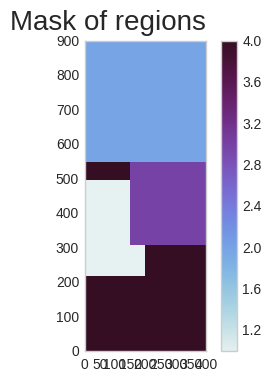

In [225]:
reg_names = ['Juan de Fuca', 'N. Strait', 'C. Strait', 'Haro Strait']
colours = ['black','orange','green', 'fuchsia']


mask = np.zeros([898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)

print('1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait')

In [226]:
#5th is for the total
BR_regs = np.zeros(5)
PI_regs = np.zeros(5)
LA_regs = np.zeros(5)
for r in range(0,4):
    LA_regs[r] = np.nanmean(LA_flx_gC_m2_yr[mask == r+1])
    PI_regs[r] = np.nanmean(PI_flx_gC_m2_yr[mask == r+1])
    BR_regs[r] = np.nanmean(BR_flx_gC_m2_yr[mask == r+1])
    
BR_regs[4] = np.nanmean(BR_flx_gC_m2_yr)
PI_regs[4] = np.nanmean(PI_flx_gC_m2_yr)
LA_regs[4] = np.nanmean(LA_flx_gC_m2_yr)


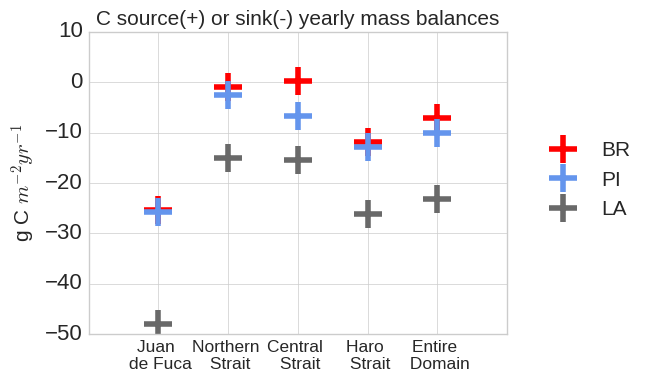

In [227]:
#1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait
regs = [1,2,3,4,5]
fact = 0.6
tms = 20
tmew = 4
fig = plt.figure(figsize=(9*fact,6.5*fact))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(regs,BR_regs,'+',mew=tmew, ms=tms,color='red', markersize = 20, label = 'BR')
ax1.plot(regs,PI_regs,'+',mew=tmew, ms=tms,color='cornflowerblue', markersize = 20, label = 'PI')
ax1.plot(regs,LA_regs,'+',mew=tmew, ms=tms,linewidth = 5, \
         color='dimgrey', markersize = 20, label = 'LA')
ax1.set_xlim([0,6])
plt.legend(bbox_to_anchor=(1.04,0.7), loc="upper left", fontsize = 15)
ax1.tick_params(labelsize=16)
ax1.set_ylabel('g C $m^{-2}yr^{-1}$',fontsize =15)
ax1.set_xticklabels(['','Juan \n de Fuca','Northern \n Strait',\
                     'Central \n Strait','Haro \n Strait','Entire \n Domain',''], fontsize = 12.5)
ax1.set_title('C source(+) or sink(-) yearly mass balances', fontsize = 15)

## Numbers summary

In [228]:
print('JDF            NS            CS          HS           Entire_DOM')
print('LA')
print(LA_regs)
print('PI_AC')
print(PI_regs)
print('BR')
print(BR_regs)

JDF            NS            CS          HS           Entire_DOM
LA
[-47.96546375 -14.9954514  -15.43144701 -26.26707842 -23.13523523]
PI_AC
[-25.73915226  -2.51942381  -6.64881628 -12.82527044 -10.04275945]
BR
[-25.41162709  -0.90823486   0.2081901  -11.81735534  -7.1339671 ]


In [229]:


LA_nonan = LA_flx_gC_m2_yr[~np.isnan(LA_flx_gC_m2_yr)]
BR_nonan = BR_flx_gC_m2_yr[~np.isnan(BR_flx_gC_m2_yr)]
PI_nonan = PI_flx_gC_m2_yr[~np.isnan(PI_flx_gC_m2_yr)]



In [230]:


#make a manual histogramming code
step = 5
t_start = -100
t_end = 40
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

bin_propLA = manual_hist(LA_nonan)
t_LA = np.copy(bin_propLA)
bin_propBR = manual_hist(BR_nonan)
t_BR = np.copy(bin_propBR)
bin_propPI = manual_hist(PI_nonan)   
t_PI = np.copy(bin_propPI)


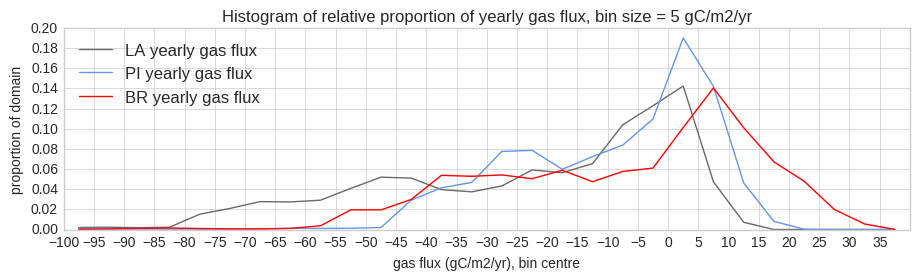

In [231]:
fact = 0.52
fig = plt.figure(figsize=(21*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)
ax1.plot(bin_centres,t_LA, color = 'dimgrey', label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_PI, color = 'cornflowerblue', label = 'PI yearly gas flux')
ax1.plot(bin_centres,t_BR, color = 'red', label = 'BR yearly gas flux')


ax1.legend(loc = 'upper left')
ax1.set_title('Histogram of relative proportion of yearly gas flux, bin size = 5 gC/m2/yr')

w = ax1.set_xticks(np.arange(-100, 40, step=5))
w = ax1.set_yticks(np.arange(0, 0.22, step=0.02))
ax1.set_xlabel('gas flux (gC/m2/yr), bin centre')
ax1.set_ylabel('proportion of domain')